In [40]:
!wget https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv

--2019-04-23 08:12:15--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv.5’

customer_churn.csv. 100%[===================>] 668.81K  --.-KB/s    in 0.06s   

2019-04-23 08:12:16 (10.6 MB/s) - ‘customer_churn.csv.5’ saved [684858/684858]



In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("customer_churn.csv")

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# !pip install -q tensorflow==2.0.0-alpha0

In [0]:
# import tensorflow as tf
# from tensorflow import keras

In [0]:
# from sklearn.model_selection import train_test_split

Exited 1: 2037
Exited 0: 7963
Proportion: 3.91 : 1


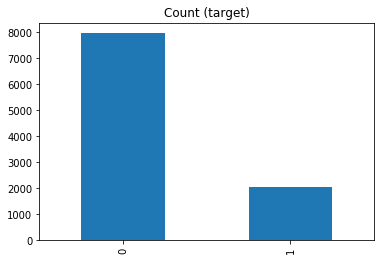

In [47]:
import numpy as np

target_count = df.Exited.value_counts()
print('Exited 1:', target_count[1])
print('Exited 0:', target_count[0])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [0]:
# Class count
count_class_0, count_class_1 = df.Exited.value_counts()
# Divide by class
df_class_0 = df[df['Exited'] == 0]
df_class_1 = df[df['Exited'] == 1]
# print(df_class_0.head())
# print(df_class_1.head())

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


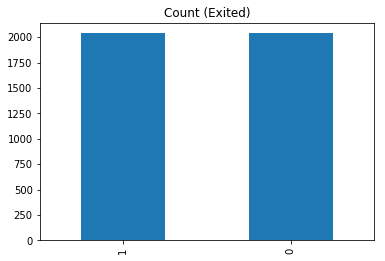

In [49]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

df_test_under.Exited.value_counts().plot(kind='bar', title='Count (Exited)');

In [0]:
# print(df_test_under)

In [51]:
#Rename the dataframe
df = df_test_under
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5759,5760,15674620,Dilibe,679,Germany,Female,37,8,77373.87,2,0,1,174873.09,0
2217,2218,15610337,Stephens,666,Spain,Male,35,2,104832.49,1,1,0,175015.12,0
8847,8848,15630244,Chu,457,France,Male,40,10,134320.23,2,1,0,150757.35,0
2148,2149,15811842,Artemyeva,630,Spain,Male,26,7,0.00,2,1,1,6656.64,0
3247,3248,15721835,Owen,791,Spain,Male,25,7,0.00,1,1,0,89666.28,0


In [0]:
!pip install -q tensorflow==2.0.0-alpha0

In [53]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [0]:
train, valid = train_test_split(train, test_size=0.2, random_state=1)

In [0]:
from tensorflow import feature_column

In [0]:
tf.random.set_seed(1)

In [59]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
feature_columns = []

In [0]:
for header in numeric_columns:
  feature_columns.append(feature_column.numeric_column(header))

In [0]:
def get_one_hot_rom_categorical(colname):
  categorical = feature_column.categorical_column_with_vocabulary_list(
  colname,
  train[colname].unique().tolist())
  return feature_column.indicator_column(categorical)

In [63]:
for col in categorical_columns:
  feature_columns.append(get_one_hot_rom_categorical(col))
  
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Germany', 'France', 'Spain'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(c

In [0]:
from tensorflow.keras import layers

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [66]:
feature_layer

In [0]:
model = keras.Sequential()
model.add(feature_layer)
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
def df_to_tfdata(df, shuffle=True, bs=32):
  df = df.copy()
  labels = df.pop('Exited')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df), seed=1)
  ds = ds.batch(bs)
  return ds

In [0]:
train_ds = df_to_tfdata(train)

In [0]:
valid_ds = df_to_tfdata(valid, shuffle=False)
test_ds = df_to_tfdata(test, shuffle=False)

In [74]:
model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 20ms/step - loss: 0.5856 - accuracy: 0.6579 - val_loss: 0.5144 - val_accuracy: 0.7469
Epoch 2/5
82/82 [==============================] - 2s 18ms/step - loss: 0.5128 - accuracy: 0.7402 - val_loss: 0.4737 - val_accuracy: 0.7837
Epoch 3/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4801 - accuracy: 0.7645 - val_loss: 0.4598 - val_accuracy: 0.7960
Epoch 4/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4666 - accuracy: 0.7821 - val_loss: 0.4566 - val_accuracy: 0.7975
Epoch 5/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4591 - accuracy: 0.7889 - val_loss: 0.4551 - val_accuracy: 0.7945


In [75]:
model.evaluate(test_ds)

26/26 [==============================] - 0s 11ms/step - loss: 0.4657 - accuracy: 0.7877


[0.4657010011948072, 0.78773004]

In [76]:
train.Exited.value_counts()

0    1310
1    1297
Name: Exited, dtype: int64

In [77]:
test.Exited.value_counts()

1    415
0    400
Name: Exited, dtype: int64